In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import itertools

In [2]:
# run this for google colab
# ! git clone https://github.com/stepkurniawan/network-analysis-wikipedia-journals.git
# df_journal = pd.read_csv('/content/network-analysis-wikipedia-journals/files/df_journal.csv')

In [3]:
df_journal = pd.read_csv('C:\\Users\\Beka\Documents\\GitHub\\network-analysis-wikipedia-journals\\files2\\df_journal.csv')

In [4]:
df_journal

,page_title,journal_name
0,overdeepening,special paper 337
1,ballitore,the economic history review
2,straffan,the economic history review
3,the true confessions of charlotte doyle,the horn book magazine
4,carbohydrate sulfotransferase,faseb j
...,...,...
1996716,muscle contraction,br j sports med
1996717,darrell issa,open medicine john willinsky
1996718,seth rollins,pro wrestling illustrated
1996719,chia seed,nutr hosp


In [5]:
df_journal = df_journal.dropna(subset=['journal_name'])
df_journal

,page_title,journal_name
0,overdeepening,special paper 337
1,ballitore,the economic history review
2,straffan,the economic history review
3,the true confessions of charlotte doyle,the horn book magazine
4,carbohydrate sulfotransferase,faseb j
...,...,...
1996716,muscle contraction,br j sports med
1996717,darrell issa,open medicine john willinsky
1996718,seth rollins,pro wrestling illustrated
1996719,chia seed,nutr hosp


In [6]:
df_num_citations = df_journal[['journal_name']].value_counts().reset_index(name='num_citation')
df_num_citations.head(10)

,journal_name,num_citation
0,nature,35475
1,journal of biological chemistry,30200
2,pnas,29544
3,science,25924
4,plos one,12602
5,billboard,10662
6,the iucn red list of threatened species,10108
7,cell,9189
8,zootaxa,8241
9,lloyds list,7347


In [7]:
areas = pd.read_csv('C:\\Users\\Beka\\Documents\\GitHub\\network-analysis-wikipedia-journals\\files2\\areas.csv', delimiter=";")
areas['journal_name'] = areas['journal_name'].str.lower()
areas['journal_name'] = areas['journal_name'].str.strip()
areas


,journal_name,area
0,21st century music,SSH
1,2d materials,PS
2,3 biotech,LS & PS
3,3d printing and additive manufacturing,PS
4,3d printing in medicine,PS & HS
...,...,...
43108,comptes rendus hebdomadaires des sxe9ances de ...,HS
43109,proceedings of the geologists association,PS
43110,the russian review,Multi
43111,palaeodiversity,LS & PS


In [8]:
# df_node_area = pd.merge_asof(df_node_size, areas, on='journal_name')
df_node_full = pd.merge(df_num_citations, areas,  on ='journal_name', how = 'left')

df_node_full

,journal_name,num_citation,area
0,nature,35475,Multi
1,journal of biological chemistry,30200,LS
2,pnas,29544,Multi
3,science,25924,Multi
4,plos one,12602,Multi
...,...,...,...
176651,bull inst fr afr noire a,1,NaN
176652,httpwwwluxurytraveladvisorcom,1,NaN
176653,httpwwwluxurytravelmagazinecom,1,NaN
176654,newcastle herald,1,NaN


In [9]:
# df_node_full_csv = df_node_full.rename(columns={'journal_name': 'ID', 'num_citation': 'weight'})
# df_node_full_csv.to_csv(r'df_node_full.csv', index = False)

# Draw Network

In [10]:
# helper function used to draw the networks
def draw_network(graph, seed=42):
    d = dict(graph.degree)
    weights = [graph[u][v]['weight'] for u,v in graph.edges]
    nx.draw(graph, 
            pos=nx.spring_layout(graph, seed=seed, 
                                 #scale = 3, k=5/math.sqrt(g.order()) 
                                 ),
            with_labels=True, 
            node_size=[w['weight'] for (_,_,w) in graph.edges(data=True)], # TODO this is still not working
            width=weights
            )
    
    # for (u,v,w) in graph.edges(data=True):
    #     print(w['weight'])

In [11]:
df_journal.nunique()

page_title      485046
journal_name    176515
dtype: int64

In [12]:
df_groupby = df_journal.groupby('page_title')['journal_name'].apply(list)
df_groupby

page_title
!women art revolution                               [library journal, film comment, film internati...
"a" is for alibi                                                                    [library journal]
"as the old sing, so pipe the young" (jan steen)    [simiolus netherlands quarterly for the histor...
"baby lollipops" murder                             [florida supreme court, florida supreme court,...
"believing women" in islam                             [international journal of middle east studies]
                                                                          ...                        
‘aziziya                                            [bulletin of the american meteorological society]
‘elepaio                                            [conservation genetics, ornithological monogra...
‘eua rail                                           [proceedings of the biological society of wash...
‘ofa likiliki                                       [winfo tonga news l

In [13]:
# make list iterations based on the combinations

journal_relation_list = []

for page in range(len(df_groupby)):
    iterations = itertools.combinations(df_groupby[page], 2)
    for iter in iterations:
        journal_relation_list.append(iter)

#journal_relation_list


In [14]:
df1 = pd.DataFrame (journal_relation_list, columns = ['journal1', 'journal2'])
df1['source'] = df1['journal1'].astype(str)
df1['target'] = df1['journal2'].astype(str)
df2 = df1[['source','target']] = pd.DataFrame(np.sort(df1[['source','target']].values), 
                                 index=df1.index, columns=['source','target'])
df2

,source,target
0,film comment,library journal
1,film international,library journal
2,film comment,film international
3,artibus et historiae,simiolus netherlands quarterly for the history...
4,florida supreme court,florida supreme court
...,...,...
22717798,auk,ornithological monographs
22717799,auk,condor
22717800,winfo tonga news letter,women today pacific
22717801,iwtc womens globalnet,winfo tonga news letter


In [15]:
df2.isna().sum()

source    0
target    0
dtype: int64

In [85]:
df_edges_full = df2[['source', 'target']].value_counts().reset_index(name='weight') # 5 Million rows
df_edges_full = df_edges_full[df_edges_full['source'] != df_edges_full['target']] # 4.9 M rows
df_edges_full

,source,target,weight
4,nature,science,51706
5,nature,pnas,43631
8,journal of biological chemistry,pnas,40297
10,pnas,science,33636
13,journal of biological chemistry,nature,24171
...,...,...,...
4964967,annals of human genetics,zentralblatt bakteriologie,1
4964968,annals of human genetics,zeitschrift fxfcr tierpsychologie,1
4964969,endocrine reviews,int j reprod biomed yazd,1
4964970,endocrine reviews,int j womens health,1


In [116]:
# df_edges_full = df_edges_full[df_edges_full.weight>1] # 1.963M rows
# df_edges_full = df_edges_full[df_edges_full.weight>2] # 1.132M rows
# df_edges_full = df_edges_full[df_edges_full.weight>10] # 241K rows
# df_edges_full = df_edges_full[df_edges_full.weight>20] # 115K rows
# df_edges_full = df_edges_full[df_edges_full.weight>100] # 19K rows
# df_edges_full = df_edges_full[df_edges_full.weight>200] # 8.5K rows
# df_edges_full2 = df_edges_full[df_edges_full.weight>1500] # 8.5K rows
df_edges_full2 = df_edges_full.iloc[:5000]
df_edges_full2

,source,target,weight
4,nature,science,51706
5,nature,pnas,43631
8,journal of biological chemistry,pnas,40297
10,pnas,science,33636
13,journal of biological chemistry,nature,24171
...,...,...,...
5538,journal of cellular biochemistry,nature,287
5539,journal of systematic palaeontology,palaeontographica abteilung a,287
5540,plos one,vertebrate anatomy morphology palaeontology,287
5541,schizophrenia bulletin,the cochrane database of systematic reviews,287


array([[<AxesSubplot:title={'center':'weight'}>]], dtype=object)

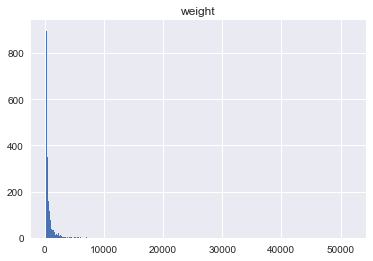

In [117]:
df_edges_full2.hist(bins = 1000)

In [118]:
# df_edges_sample = df_edges_full.sample(100)
# df_edges_sample

In [119]:
df_edges_full.nunique()

source    125848
target    127940
weight      1761
dtype: int64

In [120]:
# edges before filtering 


# df_edges_full.to_csv(r'df_edges_full.csv', index = False) 

creating networkX from DF

In [121]:
G = nx.from_pandas_edgelist(df_edges_full2, edge_attr=True) 

In [122]:
# test export back to DF

# df_edges_full = nx.to_pandas_edgelist(G)
# df_edges_full

# Path Finder

In [123]:
def minimal_pathfinder(G, r = float("inf")):
    """ 
    Args:
    -----
    G [networkX graph]:
        Graph to filter links from.
    r [float]:
        "r" parameter as in the paper.

    Returns:
    -----
    PFNET [networkX graph]:
        Graph containing only the PFNET links.
    """
    
    import networkx as nx
    from collections import defaultdict
    
    H = G.copy()
    
    # Initialize adjacency matrix W
    W = defaultdict(lambda: defaultdict(lambda: float("inf")))
    
    # Set diagonal to 0
    for u in H.nodes():
        W[u][u] = 0 
    
    # Get weights and set W values
    for i, j, d in H.edges(data=True):
        W[i][j] = d['weight'] # Add weights to W
        
    # Get shortest path distance matrix D
    dist = nx.floyd_warshall_predecessor_and_distance(H, weight='weight')[1]
    
    # Iterate over all triples to get values for D
    for k in H.nodes():
        for i in H.nodes():
            for j in H.nodes():
                if r == float("inf"): # adapted from the R-comato version which does a similar check
                # Discard non-shortest paths
                    dist[i][j] = min(dist[i][j], (dist[i][k] + dist[k][j]))
                else:
                    dist[i][j] = min(dist[i][j], (((dist[i][k]) ** r) + ((dist[k][j]) ** r )) ** (1/r))
                
    # Check for type; set placeholder for either case
    if not H.is_directed():
        PFNET = nx.Graph()
        PFNET.add_nodes_from(H.nodes(data=True))
    else:
        PFNET = nx.DiGraph()
        PFNET.add_nodes_from(H.nodes(data=True))
        
    # Add links D_ij only if == W_ij
    for i in H.nodes():
        for j in H.nodes():
            if dist[i][j] == W[i][j]: # If shortest path distance equals distance in adjacency
                if dist[i][j] == float("inf"): # Skip infinite path lengths
                    pass
                elif i == j: # Skip the diagonal
                    pass
                else: # Add link to PFNET
                    weight = dist[i][j]
                    PFNET.add_edge(i, j, weight=weight)
                    
    return PFNET

In [124]:
# draw_network(G)

In [ ]:
import time
start = time.process_time()
 
G_pf = minimal_pathfinder(G)
print(nx.info(G))
print(nx.info(G_pf))

print("process time", time.process_time() - start)


1000 rows:
Graph with 336 nodes and 1000 edges
Graph with 336 nodes and 803 edges
process time 28.359375

2000 rows:
Graph with 571 nodes and 2000 edges
Graph with 571 nodes and 1541 edges
process time 142.125

3000:
Graph with 816 nodes and 3000 edges
Graph with 816 nodes and 2315 edges
process time 414.515625

In [ ]:
# draw_network(G_pf)

pf Edges pf Table

In [ ]:
df_pf_edges = nx.to_pandas_edgelist(G_pf)
df_pf_edges

In [ ]:
# edges after PFNET filtering 

# df_pf_edges.to_csv(r'df_pf_edges.csv', index = False) 

In [ ]:
# edges after pfnet filtering and trim

df_pf_trim_edges = df_pf_edges[df_pf_edges.weight>=1500]
# df_pf_trim_edges.to_csv(r'df_pf_trim_edges.csv', index = False)

Nodes tables

In [ ]:
# before pf

unique_journal_list = np.unique(df_edges_full[['source', 'target']].values)
print(len(unique_journal_list))

# from list to DF

df_unique_journal = pd.DataFrame(unique_journal_list, columns = ['journal_name'])


# create node df

df_node_size = pd.merge(df_unique_journal, 
                     df_node_full, 
                     on ='journal_name', 
                     how ='left')


# df_node_size = df_node_size.rename(columns={'journal_name': 'ID', 'num_citation': 'weight'})
df_node_size


In [ ]:
# after PF

unique_journal_list_pf = np.unique(df_pf_edges[['source', 'target']].values)
unique_journal_list_pf
print(len(unique_journal_list_pf))

# from list to DF

df_unique_journal_pf = pd.DataFrame(unique_journal_list_pf, columns = ['journal_name'])

df_node_size_pf = pd.merge(df_unique_journal_pf, 
                     df_num_citations, 
                     on ='journal_name', 
                     how ='left')

# TODO create df_nodelist by appending areas

df_nodelist_pf = pd.merge(df_node_size_pf, 
                     df_ something*area*, 
                     on ='journal_name', 
                     how ='left')
df_nodelist_pf

In [ ]:
# after trim

# TODO 

# Gephi csv 

In [ ]:
# edge before pf
df_edgelist.to_csv(r'df_edgelist.csv', index = False)

In [ ]:
# edge after pf
df_pf_edgelist.to_csv(r'df_pf_edgelist.csv', index = False)

In [ ]:
# edge after pf and trim
df_pf_trim_edges.to_csv(r'df_pf_trim_edges.csv', index = False)

In [104]:
df_num_citations

,journal_name,num_citation
0,nature,35475
1,journal of biological chemistry,30200
2,pnas,29544
3,science,25924
4,plos one,12602
...,...,...
176510,bull inst fr afr noire a,1
176511,httpwwwluxurytraveladvisorcom,1
176512,httpwwwluxurytravelmagazinecom,1
176513,newcastle herald,1


In [105]:
unique_journal_list = np.unique(df3[['journal1', 'journal2']].values)
unique_journal_list
print(len(unique_journal_list))

249


In [69]:
df_unique_journal = pd.DataFrame(unique_journal_list, columns = ['journal_name'])
df_unique_journal

,journal_name
0,acta palaeontologica polonica
1,acta palaeontologica sinica
2,alcheringa an australasian journal of palaeont...
3,ameghiniana
4,american journal of botany
...,...
244,virology
245,wwwuniprotorg
246,zookeys
247,zoological journal of the linnean society


In [70]:
# create dataframe with unique journal list
# import pandas
# import pandas as pd
   
# read csv data
# only journals with num citations >=200
df_node_size = pd.merge(df_unique_journal, 
                     df_num_citations, 
                     on ='journal_name', 
                     how ='left')
df_node_size

,journal_name,num_citation
0,acta palaeontologica polonica,1316.0
1,acta palaeontologica sinica,87.0
2,alcheringa an australasian journal of palaeont...,339.0
3,ameghiniana,305.0
4,american journal of botany,1937.0
...,...,...
244,virology,968.0
245,wwwuniprotorg,3133.0
246,zookeys,2266.0
247,zoological journal of the linnean society,3304.0


In [71]:
df_node_size.nunique()

journal_name    249
num_citation    238
dtype: int64

In [88]:
df_node_area.isna().sum()

journal_name      0
num_citation      1
area            111
dtype: int64

In [89]:
df_node_area.to_excel(r'df_node_area.xlsx', index = False)

In [47]:
# df_node_size.to_csv("node_size.csv", index=False)